# Ensemble Techniques
1. Bagggin - Random Forest (Multiple trees are created in parallel randomly.)
2. Boosting - Gradient Boosting (Multiple trees are created squentially while imporoving the modle.)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv ('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Perform Basic Data Quality checks


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
m= df.isna().sum()
m

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

### Step 3: Seperate X and Y(Survived)

1. PassengerId, Name, Ticket are statistically insignificant
2. Cabin is removed because it has lots of missing values



In [13]:
x = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
y = df [['Survived']]

In [11]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Step 4: Preprocessing on X


In [15]:
cat = list(x.columns[x.dtypes == 'object'])
con = list(x.columns[x.dtypes!='object'])

In [16]:
cat

['Sex', 'Embarked']

In [17]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [20]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

In [21]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [22]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 5: Apply Train Test Split


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [24]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [25]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [27]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [28]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [29]:
xtrain.shape

(712, 10)

In [31]:
xtest.shape

(179, 10)

### Step 6: Model Building


In [33]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion='entropy'
)
model1.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [34]:
model1.score(xtrain, ytrain)

0.6404494382022472

In [35]:
model1.score(xtest, ytest)

0.6201117318435754

### Hyperparameter tuning Random Forest


In [36]:
params = {
    'n_estimators' : [10,20,50,100,200],
    "max_depth" : [2,3,4,5],
    'min_samples_split' : [5,6,7,8,910]
}

### Use randomized Search CV for faster tuning


In [37]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rscv_rf = RandomizedSearchCV (rf, param_distributions=params, cv=5, scoring='f1_macro')
rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8, 910],
                                        'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='f1_macro')

In [38]:
rscv_rf.best_params_

{'n_estimators': 50, 'min_samples_split': 6, 'max_depth': 4}

In [39]:
rscv_rf.best_score_

0.7977831462578728

In [40]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=4, min_samples_split=6, n_estimators=50)

### Model evaluation - Random Forest


In [41]:
best_rf.score(xtrain,ytrain)

0.8441011235955056

In [42]:
best_rf.score(xtest, ytest)

0.8212290502793296

In [43]:
ypred_train = best_rf.predict(xtrain)
ypred_test = best_rf.predict(xtest)

In [44]:
ypred_train[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [45]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [46]:
ypred_test[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [47]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


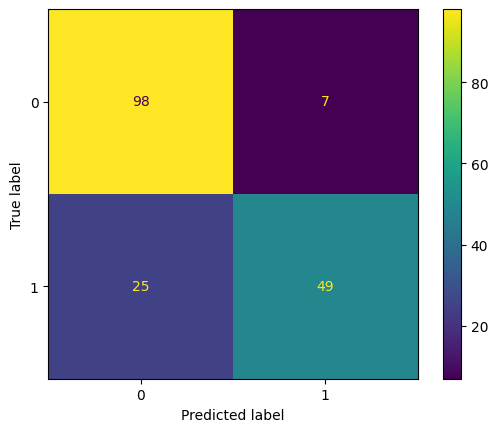

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator (best_rf,xtest,ytest)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.88      0.66      0.75        74

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



# Gradient Boosting


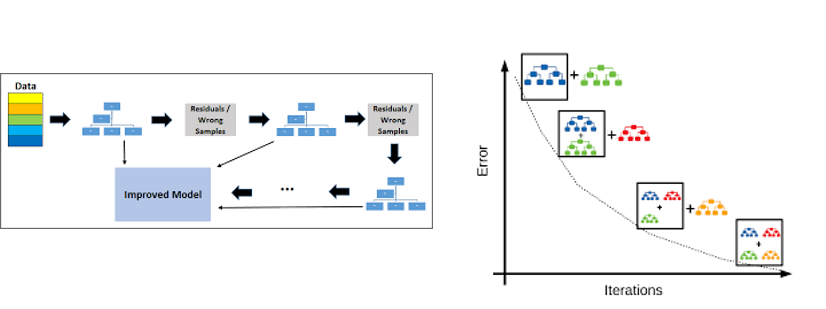

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(
    learning_rate=0.001,
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5
)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [51]:
model2.score(xtrain,ytrain)

0.6235955056179775

In [52]:
model2.score(xtest, ytest)

0.5865921787709497

### Hyperparameter tuning of gradient boost


In [53]:
params2 = {
    'learning_rate' : [0.001, 0.01, 0.015, 0.2],
    'n_estimators' : [10,50,100,150,200,300],
    'max_depth' : [2,3,4,5]
}

In [55]:
gbc = GradientBoostingClassifier()
rscv_gb = RandomizedSearchCV (gbc, param_distributions= params2, cv=5, scoring='f1_macro')
rscv_gb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.015,
                                                          0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         300]},
                   scoring='f1_macro')

In [56]:
rscv_gb.best_params_

{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.015}

In [57]:
rscv_gb.best_score_

0.8068951940452681

In [58]:
best_gb = rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(learning_rate=0.015, n_estimators=300)

In [59]:
best_gb.score(xtrain, ytrain)

0.8778089887640449

In [60]:
best_gb.score(xtest, ytest)

0.8156424581005587

In [61]:
ypred_train2 = best_gb.predict(xtrain)
ypred_test2 = best_gb.predict(xtest)

In [62]:
ypred_test2[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [63]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [64]:
ypred_test2[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [65]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


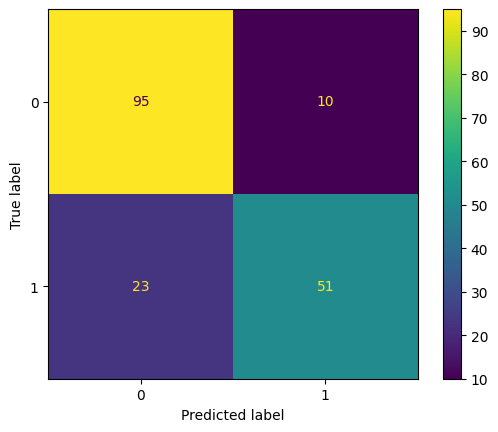

In [66]:
ConfusionMatrixDisplay.from_estimator(best_gb, xtest, ytest)

In [67]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



### Selcting Gradient Boost model as it has higer f1_macro cross validated of 0.8051


### Feature importance


In [69]:
best_gb.feature_importances_


array([0.14132905, 0.10920725, 0.05183367, 0.00495321, 0.14102095,
       0.16155536, 0.35617341, 0.0049332 , 0.00285471, 0.02613919])

In [70]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [72]:
imp = pd.Series (best_gb.feature_importances_, index=xtrain.columns)
imp

num__Pclass        0.141329
num__Age           0.109207
num__SibSp         0.051834
num__Parch         0.004953
num__Fare          0.141021
cat__Sex_female    0.161555
cat__Sex_male      0.356173
cat__Embarked_C    0.004933
cat__Embarked_Q    0.002855
cat__Embarked_S    0.026139
dtype: float64

In [73]:
imp.sort_values(ascending=False)


cat__Sex_male      0.356173
cat__Sex_female    0.161555
num__Pclass        0.141329
num__Fare          0.141021
num__Age           0.109207
num__SibSp         0.051834
cat__Embarked_S    0.026139
num__Parch         0.004953
cat__Embarked_C    0.004933
cat__Embarked_Q    0.002855
dtype: float64

<Axes: >

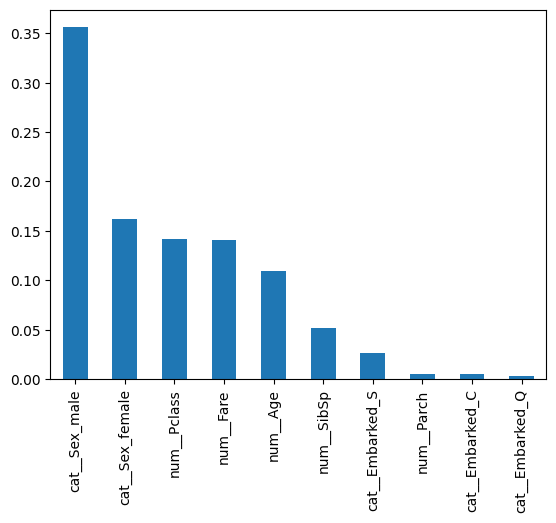

In [76]:
imp.sort_values(ascending=False).plot (kind='bar')


### Out of sample prediction


In [77]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [79]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [80]:
preds = best_gb.predict(xnew_pre)
probs = best_gb.predict_proba(xnew_pre)

In [81]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [82]:
probs[0:5]

array([[0.88987043, 0.11012957],
       [0.612496  , 0.387504  ],
       [0.89656014, 0.10343986],
       [0.8825387 , 0.1174613 ],
       [0.55375136, 0.44624864]])

In [83]:
best_gb.classes_

array([0, 1], dtype=int64)

In [85]:
prob_sur = probs[:,1]
prob_sur [0:5]

array([0.11012957, 0.387504  , 0.10343986, 0.1174613 , 0.44624864])

### Save above results in dataframe


In [87]:
df_final = xnew[['PassengerId']]
df_final ['Survived_pred'] = preds
df_final['Prob'] = prob_sur
df_final

,PassengerId,Survived_pred,Prob
0,892,0,0.110130
1,893,0,0.387504
2,894,0,0.103440
3,895,0,0.117461
4,896,0,0.446249
...,...,...,...
413,1305,0,0.117461
414,1306,1,0.936895
415,1307,0,0.115760
416,1308,0,0.117461


In [88]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    288
1    130
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

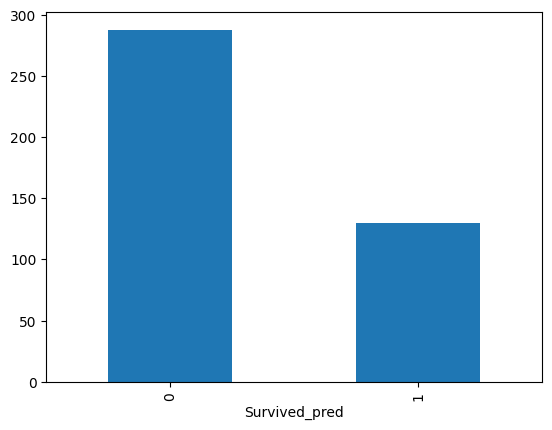

In [89]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

In [90]:
df_final.to_csv('ensmbleResults.csv', index=False)